In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Chi Square Test
Used to evaluate categorical variable in the classification task

In [2]:
df=pd.read_csv('./dataset/titanic.csv')

In [3]:
#selecting the categorical feature
cat_df=df[['survived','pclass','sex','embarked','alone']]

In [4]:
cat_df

,survived,pclass,sex,embarked,alone
0,0,3,male,S,False
1,1,1,female,C,False
2,1,3,female,S,True
3,1,1,female,S,False
4,0,3,male,S,True
...,...,...,...,...,...
886,0,2,male,S,True
887,1,1,female,S,True
888,0,3,female,S,False
889,1,1,male,C,True


In [5]:
#checking the null values
cat_df.isnull().sum()

survived    0
pclass      0
sex         0
embarked    2
alone       0
dtype: int64

In [6]:
#Filling the null values
cat_df['embarked']=cat_df['embarked'].fillna(cat_df['embarked'].mode()[0])

In [7]:
#Label encoding need to done before passing categorical column to chi square
print(df['sex'].unique())
print(df['embarked'].unique())
print(df['alone'].unique())

['male' 'female']
['S' 'C' 'Q' nan]
[False  True]


In [8]:
cat_df['sex']=cat_df['sex'].map({'male':1,'female':0})
cat_df['embarked']=cat_df['embarked'].map({'S':0,'C':1,'Q':2,'nan':3})
cat_df['alone']=cat_df['alone'].map({False:0,True:1})

In [9]:
cat_df

,survived,pclass,sex,embarked,alone
0,0,3,1,0,0
1,1,1,0,1,0
2,1,3,0,0,1
3,1,1,0,0,0
4,0,3,1,0,1
...,...,...,...,...,...
886,0,2,1,0,1
887,1,1,0,0,1
888,0,3,0,0,0
889,1,1,1,1,1


In [10]:
#Seperate The Depedant And Indepedant Feature
X=cat_df.drop('survived',axis=1)
y=df['survived']

In [11]:
#Splitting The Data Into Train And Test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
print('shape of ax_train',X_train.shape,
     '\nshape of ax_train',X_test.shape)

shape of ax_train (712, 4) 
shape of ax_train (179, 4)


In [12]:
from sklearn.feature_selection import chi2
f_p=chi2(X_train,y_train)
f_p

(array([27.47313148, 74.3000848 ,  9.69735055, 15.14726188]),
 array([1.59292189e-07, 6.71006281e-18, 1.84533882e-03, 9.94424223e-05]))

Chi Square returns two values F-score and P-value

The more higher F-score value the feature more important

viseversa the lesser the P-value the feature is more important

In [13]:
P_value=pd.Series(f_p[1])
P_value.index=X_train.columns

In [14]:
P_value.sort_values(ascending=True)

sex         6.710063e-18
pclass      1.592922e-07
alone       9.944242e-05
embarked    1.845339e-03
dtype: float64

<AxesSubplot: >

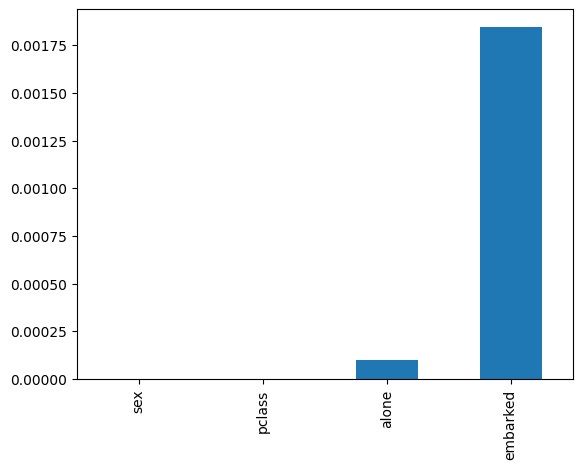

In [15]:
P_value.sort_values(ascending=True).plot(kind='bar')

embarked having higher P-value means it is not important

In [16]:
F_score=pd.Series(f_p[0])
F_score.index=X_train.columns

In [17]:
F_score.sort_values(ascending=True)

embarked     9.697351
alone       15.147262
pclass      27.473131
sex         74.300085
dtype: float64

<AxesSubplot: >

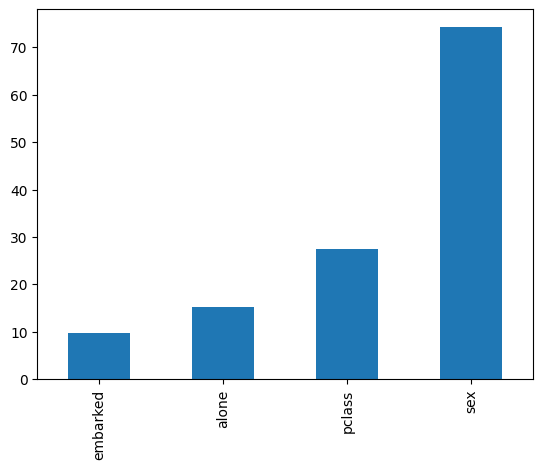

In [18]:
F_score.sort_values(ascending=True).plot(kind='bar')

F Score indicates sex feature has highest importance amd embarked has lowest
